In [ ]:
#ex 1

In [5]:
import pyod
import scipy
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from matplotlib.pyplot import scatter

In [6]:
mean = 1
variance_x = 2
variance_y = 4
a = 2
b = 4

size = 100

In [7]:
def compute_leverage(x):
    X = np.column_stack((np.ones_like(x), x))  # Add intercept
    U, _, _ = np.linalg.svd(X, full_matrices = False)
    H = U @ U.T
    return np.diag(H)

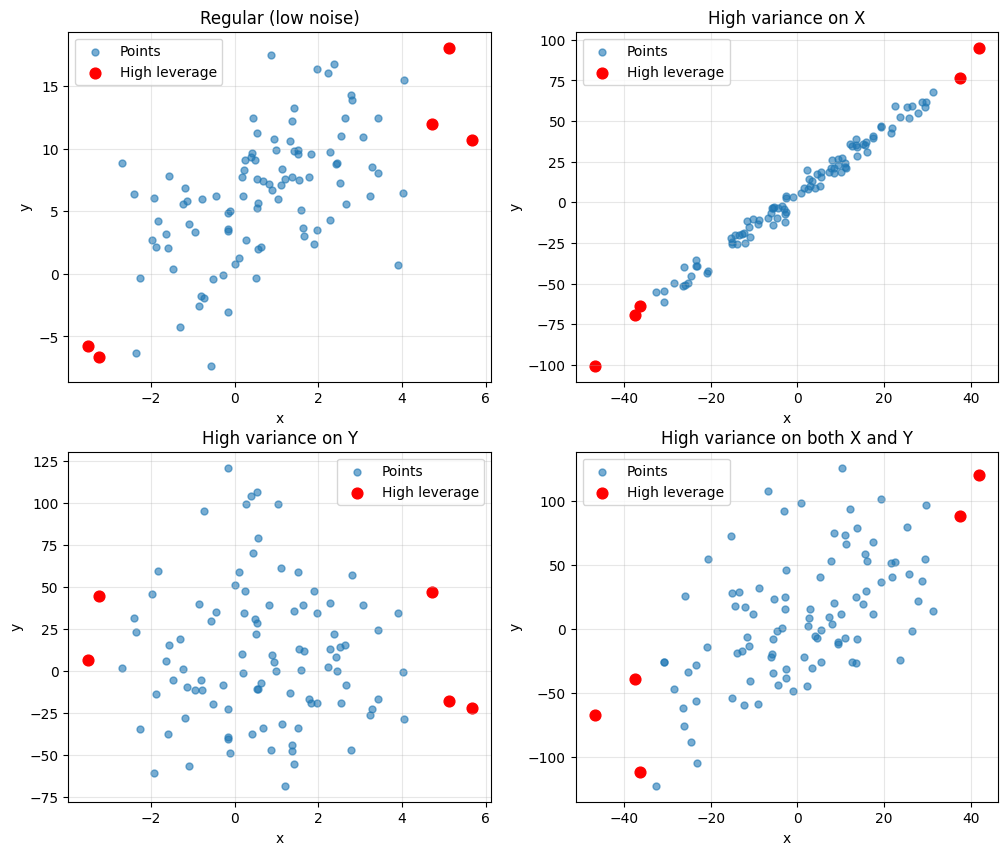

In [8]:
# 1D y = a*x + b + epsi

x_regular = np.random.normal(mean, variance_x, size)
x_high    = np.random.normal(mean, variance_x * 10, size)

epsi_regular  = np.random.normal(mean, variance_y, size)
epsi_high     = np.random.normal(mean, variance_y * 10, size)

y_regular         = a * x_regular + b + epsi_regular
y_high_x_variance = a * x_high + b + epsi_regular
y_high_y_variance = a * x_regular + b + epsi_high
y_high_both       = a * x_high + b + epsi_high

lev_regular = compute_leverage(x_regular)
lev_high_x = compute_leverage(x_high)
lev_high_y = compute_leverage(x_regular)
lev_high_both = compute_leverage(x_high)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

datasets = [
    ("Regular (low noise)", x_regular, y_regular, lev_regular),
    ("High variance on X", x_high, y_high_x_variance, lev_high_x),
    ("High variance on Y", x_regular, y_high_y_variance, lev_high_y),
    ("High variance on both X and Y", x_high, y_high_both, lev_high_both),
]

for i, (title, x, y, lev) in enumerate(datasets):
    ax = axes[i]
    ax.scatter(x, y, s=25, alpha=0.6, label="Points")

    # Mark top 5 highest leverage points
    top_idx = np.argsort(lev)[-5:]
    ax.scatter(x[top_idx], y[top_idx], color='red', s=60, label='High leverage')

    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend()
    ax.grid(alpha=0.3)


In [9]:
def compute_leverage_2D(x1, x2):
  X = np.column_stack((np.ones(size), x1, x2))
  U, _, _ = np.linalg.svd(X, full_matrices = False)
  H = U @ U.T
  return np.diag(H)

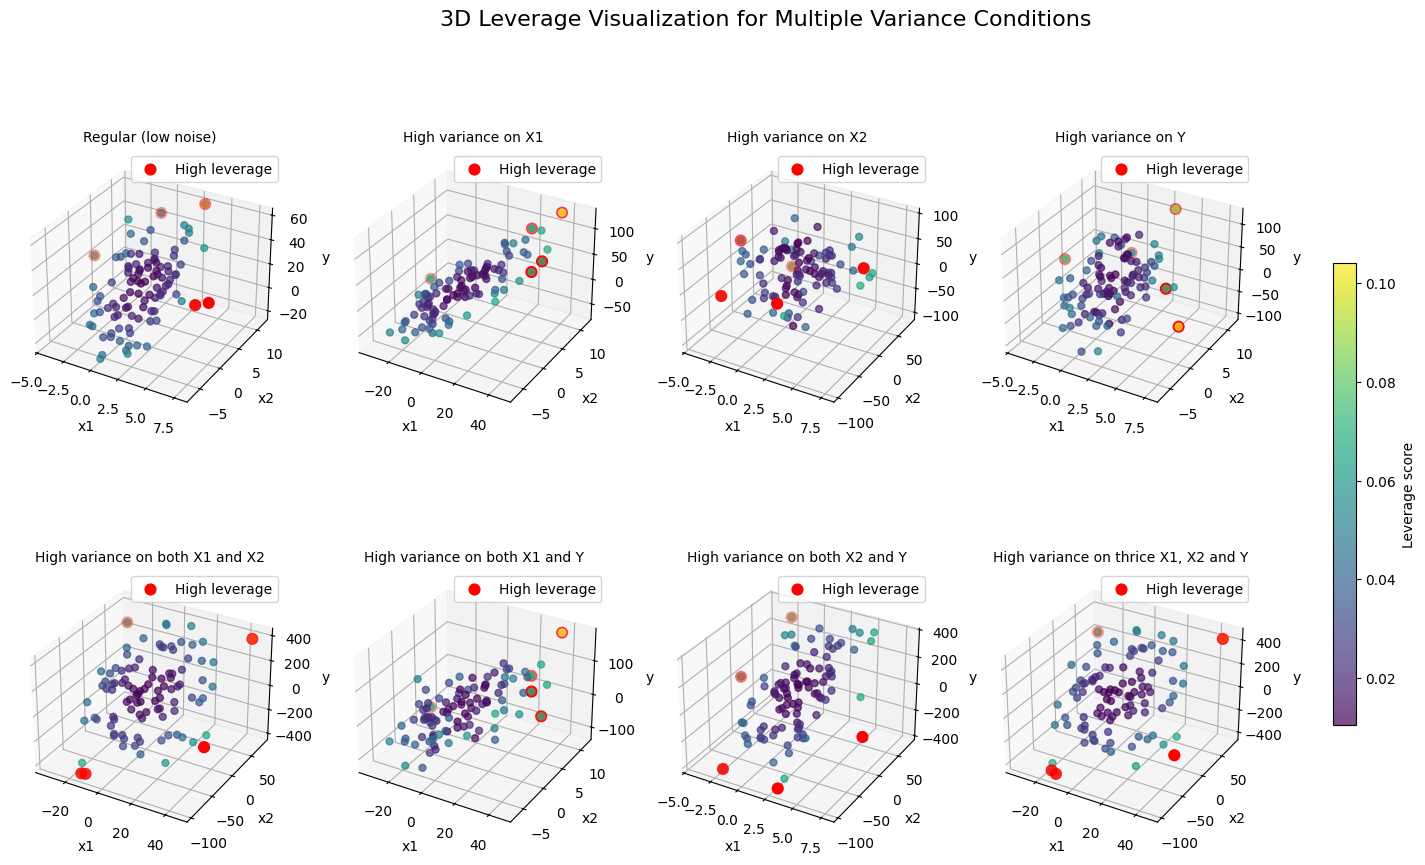

In [10]:
# 2D y = a * x1 + b * x2 + c + epsi
x1_regular = np.random.normal(mean, variance_x, size)
x1_high    = np.random.normal(mean, variance_x * 10, size)

x2_regular = np.random.normal(mean, 4, size)
x2_high    = np.random.normal(mean, 40, size)

c = 8

epsi_regular  = np.random.normal(mean, variance_y, size)
epsi_high     = np.random.normal(mean, variance_y * 10, size)

y_regular           = a * x1_regular + b * x2_regular + c + epsi_regular
y_high_x1_variance  = a * x1_high + b * x2_regular + c + epsi_regular
y_high_x2_variance  = a * x1_regular + b * x2_high + c + epsi_regular
y_high_y_variance   = a * x1_regular + b * x2_regular + c + epsi_high
y_high_x1_x2        = a * x1_high + b * x2_high + c + epsi_regular
y_high_x1_y         = a * x1_high + b * x2_regular + c + epsi_high
y_high_x2_y         = a * x1_regular + b * x2_high + c + epsi_high
y_high_all          = a * x1_high + b * x2_high + c + epsi_high

lev_regular = compute_leverage_2D(x1_regular, x2_regular)
lev_high_x1 = compute_leverage_2D(x1_high, x2_regular)
lev_high_x2 = compute_leverage_2D(x1_regular, x2_high)
lev_high_y = compute_leverage_2D(x1_regular, x2_regular)
lev_high_x1_x2 = compute_leverage_2D(x1_high, x2_high)
lev_high_x1_y = compute_leverage_2D(x1_high, x2_regular)
lev_high_x2_y = compute_leverage_2D(x1_regular, x2_high)
lev_high_all = compute_leverage_2D(x1_high, x2_high)

datasets = [
    ("Regular (low noise)", x1_regular, x2_regular, y_regular, lev_regular),
    ("High variance on X1", x1_high, x2_regular, y_high_x1_variance, lev_high_x1),
    ("High variance on X2", x1_regular, x2_high, y_high_x_variance, lev_high_x2),
    ("High variance on Y", x1_regular, x2_regular, y_high_y_variance, lev_high_y),
    ("High variance on both X1 and X2", x1_high, x2_high, y_high_x1_x2, lev_high_x1_x2),
    ("High variance on both X1 and Y", x1_high, x2_regular, y_high_x1_y, lev_high_x1_y),
    ("High variance on both X2 and Y", x1_regular, x2_high, y_high_x2_y, lev_high_x2_y),
    ("High variance on thrice X1, X2 and Y", x1_high, x2_high, y_high_all, lev_high_all),
]

fig = plt.figure(figsize=(20, 10))
for i, (title, x1, x2, y, lev) in enumerate(datasets):
    ax = fig.add_subplot(2, 4, i+1, projection='3d')

    # All points (colored by leverage)
    p = ax.scatter(x1, x2, y, c=lev, cmap='viridis', s=25, alpha=0.7)

    # Highlight top 5 leverage points
    top_idx = np.argsort(lev)[-5:]
    ax.scatter(x1[top_idx], x2[top_idx], y[top_idx],
               color='red', s=60, label='High leverage')

    # Labels and title
    ax.set_title(title, fontsize=10)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    ax.legend()
    ax.grid(alpha=0.3)

# Colorbar (shared)
fig.colorbar(p, ax=fig.axes, shrink=0.6, label='Leverage score')
plt.suptitle("3D Leverage Visualization for Multiple Variance Conditions", fontsize=16)
plt.show()


In [ ]:
#ex 2

In [2]:
from pyod.models.knn import KNN
from pyod.utils.data import generate_data_clusters
from sklearn.metrics import balanced_accuracy_score

In [3]:
n_train = 400
n_test = 200
n_clusters = 2
contamination = 0.1
n_features = 2

In [11]:
X_train, X_test, y_train, y_test = generate_data_clusters(
    n_train=n_train,
    n_test=n_test,
    n_clusters=n_clusters,
    contamination=contamination,
    n_features=n_features,
)

k_values = [5, 15, 50]

cmap = plt.cm.coolwarm


--- Results for n_neighbors = 5 ---
Train Balanced Accuracy: 0.9255
Test Balanced Accuracy:  0.9231
-----------------------------


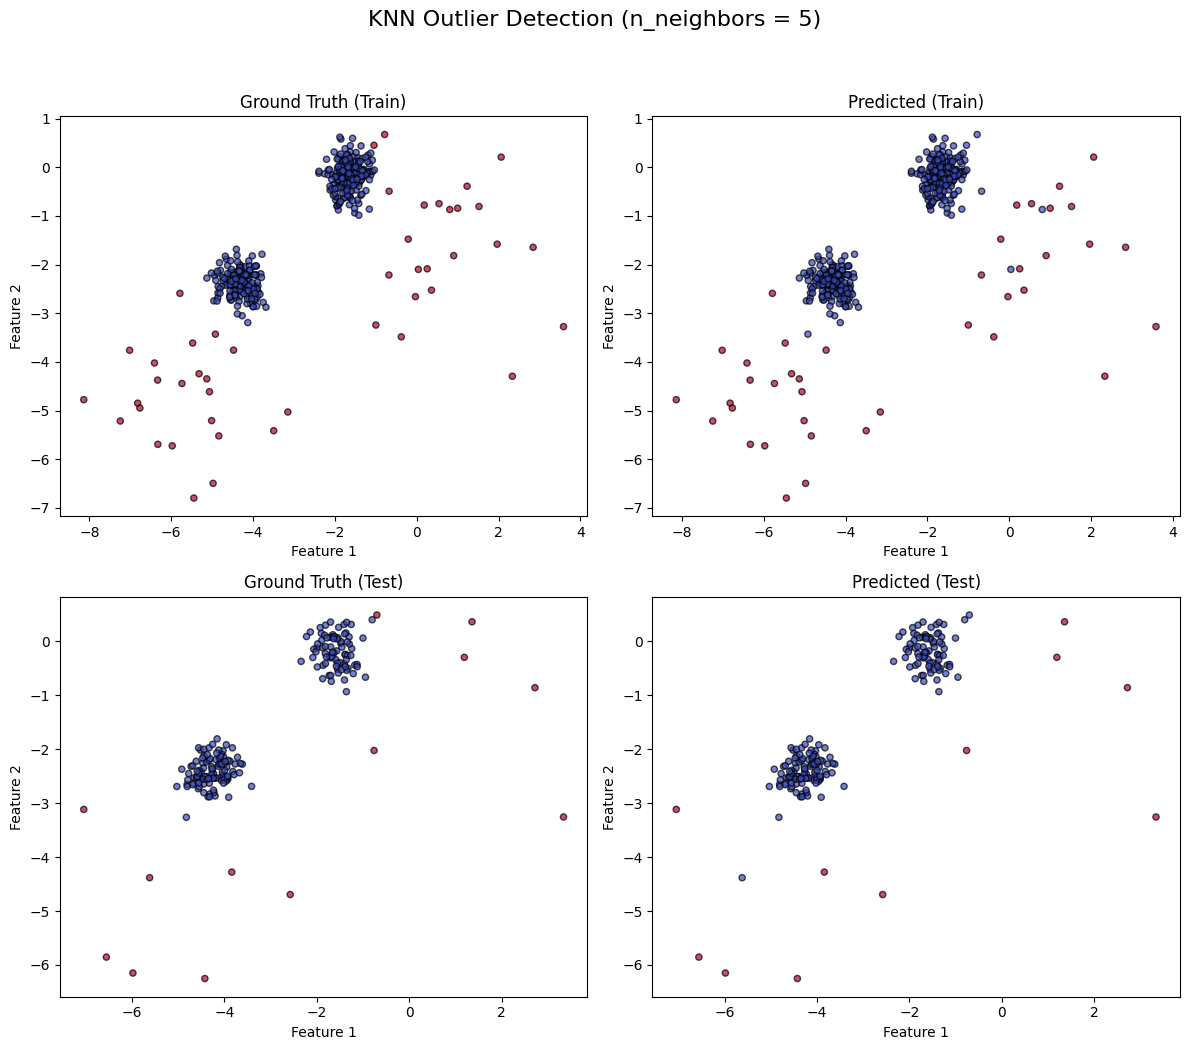


--- Results for n_neighbors = 15 ---
Train Balanced Accuracy: 0.9255
Test Balanced Accuracy:  0.9615
------------------------------


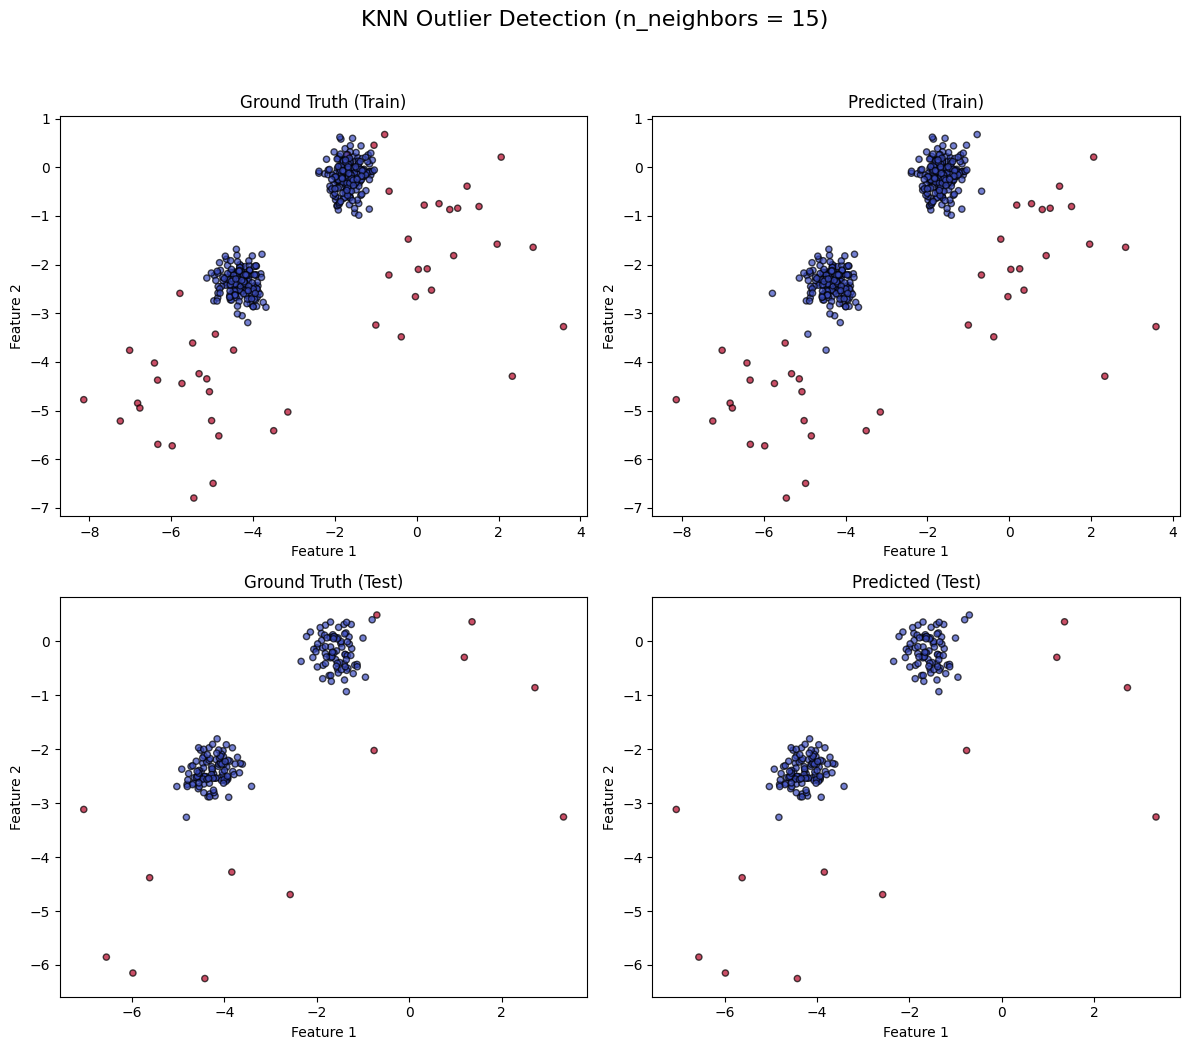


--- Results for n_neighbors = 50 ---
Train Balanced Accuracy: 0.9255
Test Balanced Accuracy:  0.9615
------------------------------


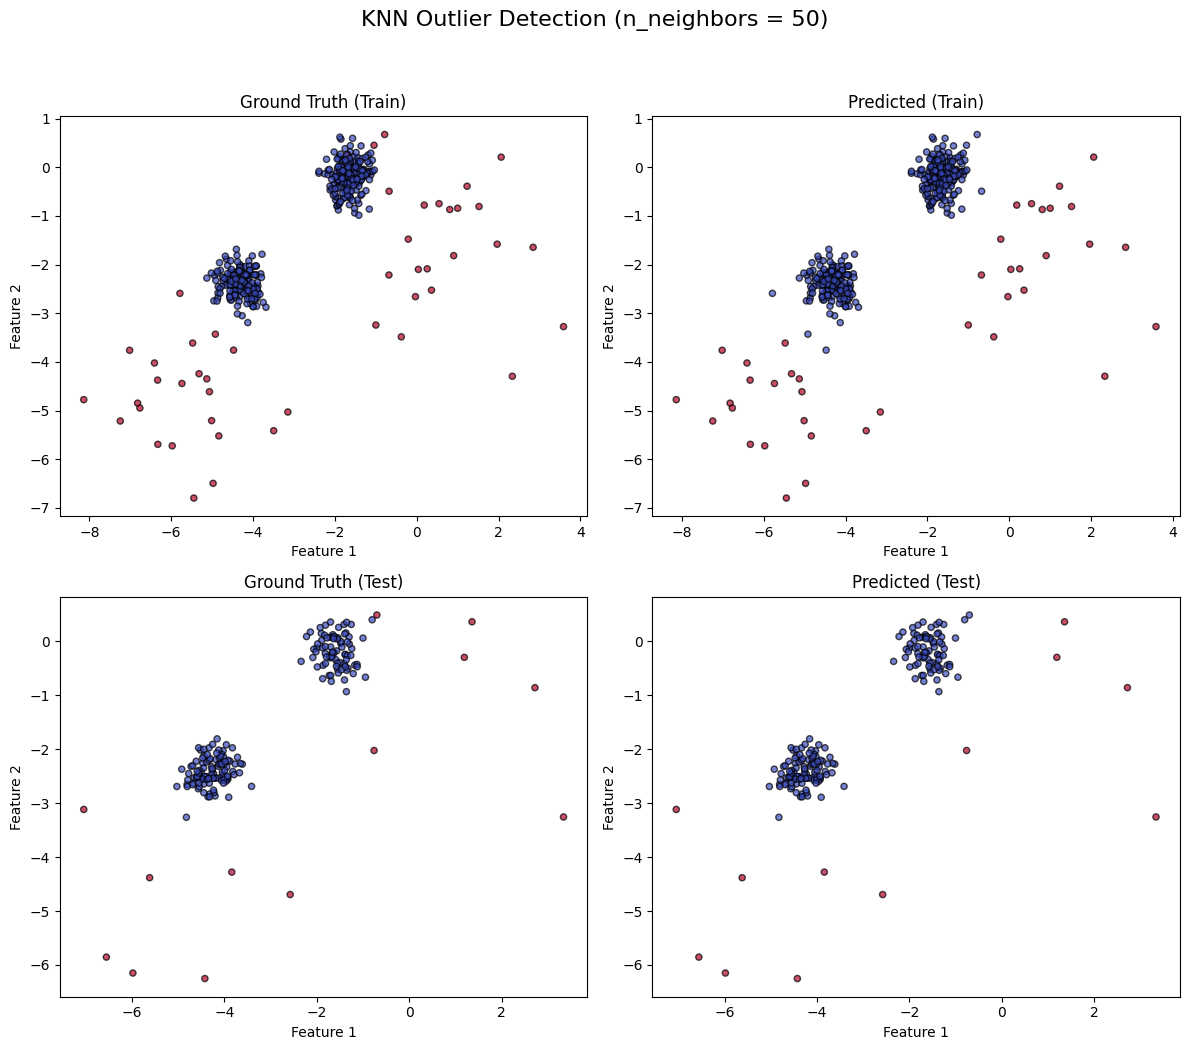

In [12]:
for k in k_values:
    clf = KNN(n_neighbors=k, contamination=contamination)
    clf.fit(X_train)

    y_train_pred = clf.labels_
    y_test_pred = clf.predict(X_test)

    train_acc = balanced_accuracy_score(y_train, y_train_pred)
    test_acc = balanced_accuracy_score(y_test, y_test_pred)

    print(f"\n--- Results for n_neighbors = {k} ---")
    print(f"Train Balanced Accuracy: {train_acc:.4f}")
    print(f"Test Balanced Accuracy:  {test_acc:.4f}")
    print("-" * (28 + len(str(k))))

    # 5. Visualize Results in 4 Subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 11))
    fig.suptitle(f"KNN Outlier Detection (n_neighbors = {k})", fontsize=16)

    # Ground Truth (Train)
    axs[0, 0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap, s=20, edgecolors='k', alpha=0.7)
    axs[0, 0].set_title("Ground Truth (Train)")
    axs[0, 0].set_xlabel("Feature 1")
    axs[0, 0].set_ylabel("Feature 2")

    # Predicted (Train)
    axs[0, 1].scatter(X_train[:, 0], X_train[:, 1], c=y_train_pred, cmap=cmap, s=20, edgecolors='k', alpha=0.7)
    axs[0, 1].set_title("Predicted (Train)")
    axs[0, 1].set_xlabel("Feature 1")
    axs[0, 1].set_ylabel("Feature 2")

    # Ground Truth (Test)
    axs[1, 0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap, s=20, edgecolors='k', alpha=0.7)
    axs[1, 0].set_title("Ground Truth (Test)")
    axs[1, 0].set_xlabel("Feature 1")
    axs[1, 0].set_ylabel("Feature 2")

    # Predicted (Test)
    axs[1, 1].scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred, cmap=cmap, s=20, edgecolors='k', alpha=0.7)
    axs[1, 1].set_title("Predicted (Test)")
    axs[1, 1].set_xlabel("Feature 1")
    axs[1, 1].set_ylabel("Feature 2")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [ ]:
# ex 3

In [19]:
from sklearn.datasets import make_blobs
from pyod.models.lof import LOF

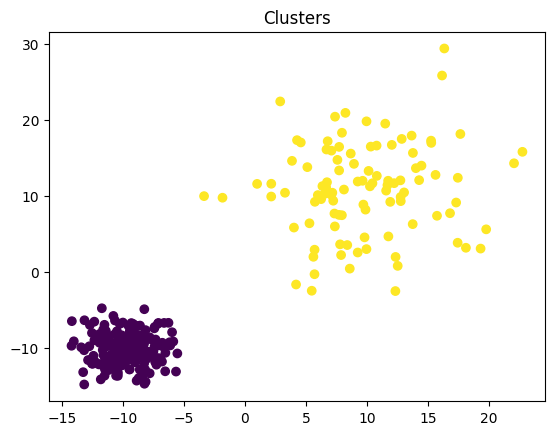

In [20]:
n_samples = [200, 100]
centers = [(-10, -10), (10, 10)]
cluster_std = [2.0, 6.0]
contamination = 0.07

X, y_true_clusters = make_blobs(
    n_samples=n_samples,
    centers=centers,
    cluster_std=cluster_std,
    n_features=2,
)

plt.scatter(X[:, 0], X[:, 1], c=y_true_clusters)
plt.title("Clusters")
plt.show()


--- Running models for n_neighbors = 5 ---


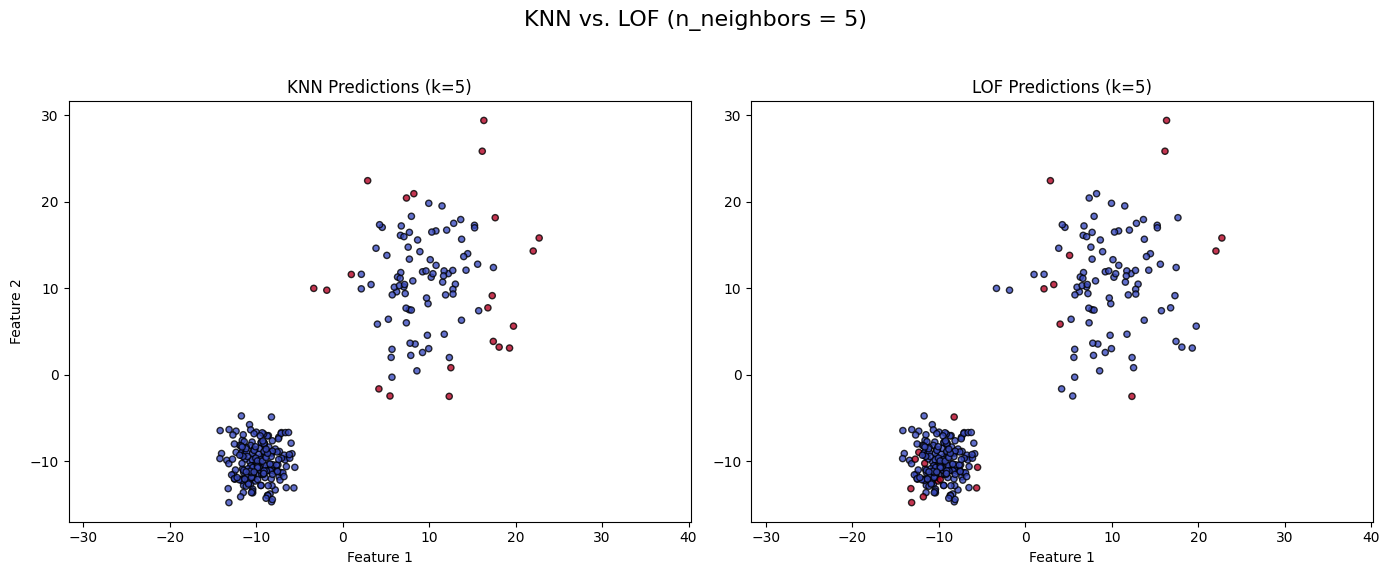


--- Running models for n_neighbors = 20 ---


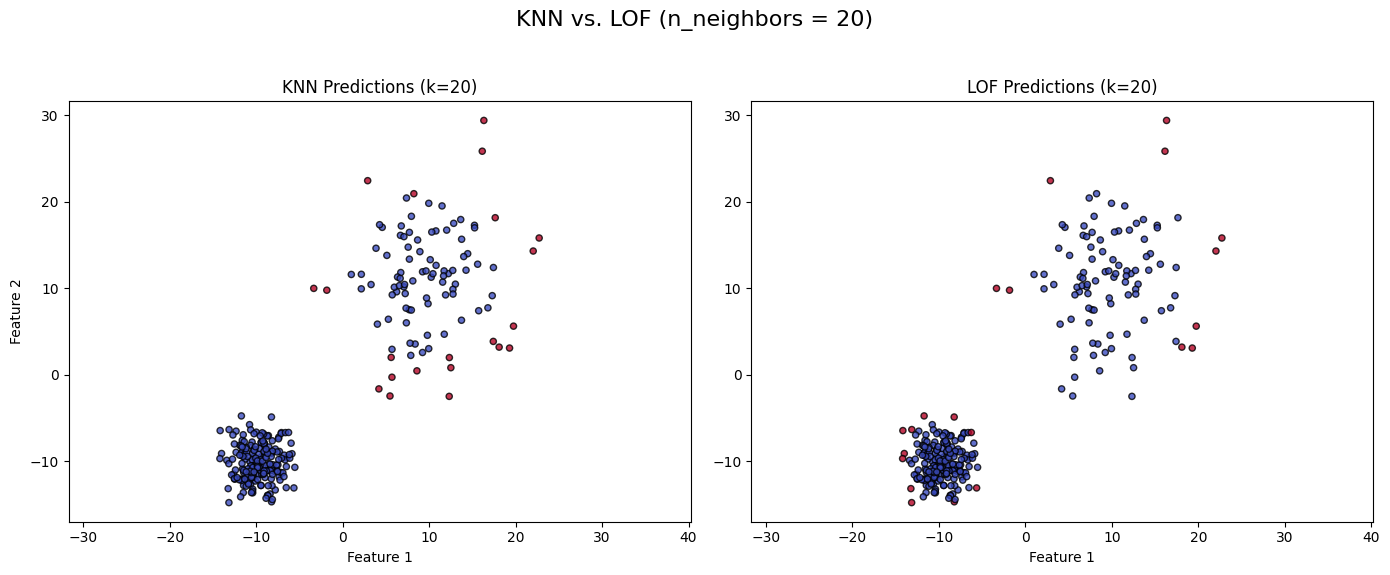


--- Running models for n_neighbors = 50 ---


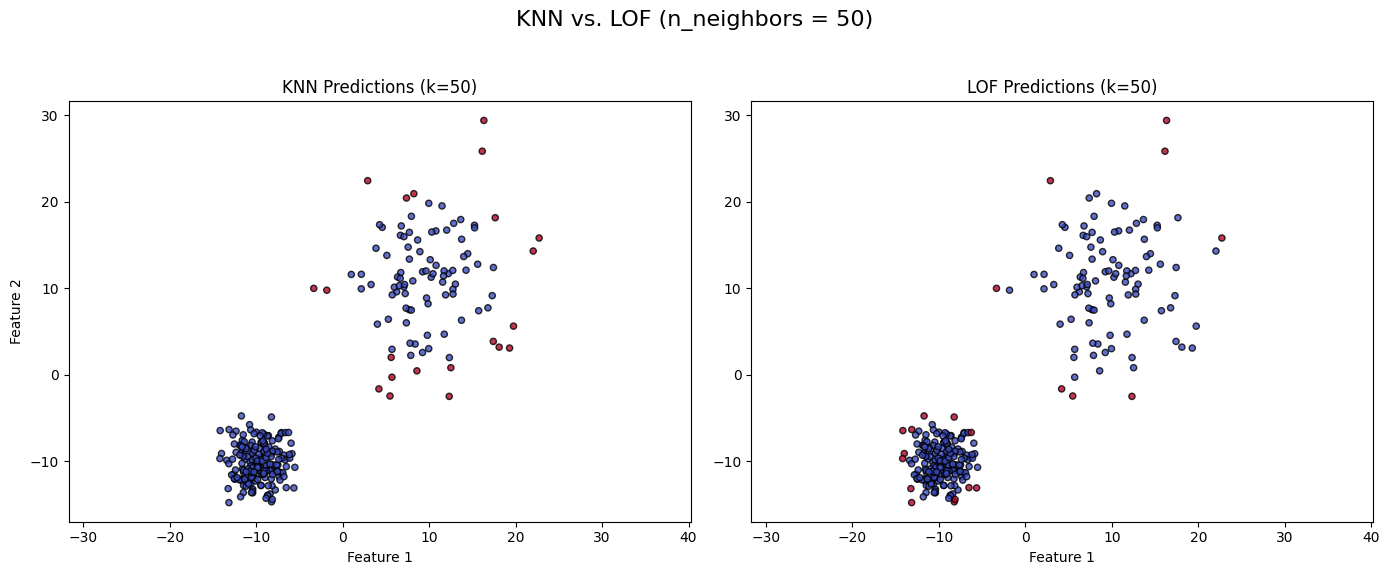

In [21]:
cmap = plt.cm.coolwarm

k_values = [5, 20, 50]

for k in k_values:
    print(f"\n--- Running models for n_neighbors = {k} ---")

    clf_knn = KNN(n_neighbors=k, contamination=contamination)
    clf_knn.fit(X)

    clf_lof = LOF(n_neighbors=k, contamination=contamination)
    clf_lof.fit(X)

    y_pred_knn = clf_knn.labels_
    y_pred_lof = clf_lof.labels_

    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle(f"KNN vs. LOF (n_neighbors = {k})", fontsize=16)

    axs[0].scatter(X[:, 0], X[:, 1], c=y_pred_knn, cmap=cmap, s=20, edgecolors='k', alpha=0.8)
    axs[0].set_title(f"KNN Predictions (k={k})")
    axs[0].set_xlabel("Feature 1")
    axs[0].set_ylabel("Feature 2")
    axs[0].axis('equal')

    axs[1].scatter(X[:, 0], X[:, 1], c=y_pred_lof, cmap=cmap, s=20, edgecolors='k', alpha=0.8)
    axs[1].set_title(f"LOF Predictions (k={k})")
    axs[1].set_xlabel("Feature 1")
    axs[1].axis('equal')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [ ]:
# ex 4

In [35]:
import numpy as np
import scipy.io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.utils.utility import standardizer
from pyod.models.combination import average, maximization

In [31]:
def evaluate_strategy(y_train, y_test, train_scores, test_scores, strategy_name, contamination_rate):
    threshold = np.quantile(train_scores, 1 - contamination_rate)

    print(f'Strategy: {strategy_name}')
    print(f'Threshold (from train data): {threshold:.4f}')

    y_train_pred = (train_scores > threshold).astype(int)
    y_test_pred = (test_scores > threshold).astype(int)

    train_ba = balanced_accuracy_score(y_train, y_train_pred)
    test_ba = balanced_accuracy_score(y_test, y_test_pred)

    print(f'Train Balanced Accuracy: {train_ba:.4f}')
    print(f'Test Balanced Accuracy:  {test_ba:.4f}')

In [36]:
DATA_FILE = 'cardio.mat'

contamination = 0.1
mat = scipy.io.loadmat(DATA_FILE)

X = mat['X']
y = mat['y'].ravel()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

n_neighbors_list = np.linspace(30, 120, 10, dtype=int)

train_scores_knn_list = []
test_scores_knn_list = []
train_scores_lof_list = []
test_scores_lof_list = []

for k in n_neighbors_list:
    # KNN
    clf_knn = KNN(n_neighbors=k, contamination=contamination)
    clf_knn.fit(X_train_norm)

    train_scores_knn_list.append(clf_knn.decision_scores_)
    test_scores_knn_list.append(clf_knn.decision_function(X_test_norm))

    y_train_pred_knn = clf_knn.labels_
    y_test_pred_knn = clf_knn.predict(X_test_norm)
    print(f'  KNN (k={k}) Train BA: {balanced_accuracy_score(y_train, y_train_pred_knn):.4f}')
    print(f'  KNN (k={k}) Test BA:  {balanced_accuracy_score(y_test, y_test_pred_knn):.4f}')

    # LOF
    clf_lof = LOF(n_neighbors=k, contamination=contamination)
    clf_lof.fit(X_train_norm)

    train_scores_lof_list.append(clf_lof.decision_scores_)
    test_scores_lof_list.append(clf_lof.decision_function(X_test_norm))

    y_train_pred_lof = clf_lof.labels_
    y_test_pred_lof = clf_lof.predict(X_test_norm)
    print(f'  LOF (k={k}) Train BA: {balanced_accuracy_score(y_train, y_train_pred_lof):.4f}')
    print(f'  LOF (k={k}) Test BA:  {balanced_accuracy_score(y_test, y_test_pred_lof):.4f}')

train_scores_knn = np.column_stack(train_scores_knn_list)
test_scores_knn = np.column_stack(test_scores_knn_list)
train_scores_lof = np.column_stack(train_scores_lof_list)
test_scores_lof = np.column_stack(test_scores_lof_list)

train_scores_knn_norm, test_scores_knn_norm = standardizer(train_scores_knn, test_scores_knn)
train_scores_lof_norm, test_scores_lof_norm = standardizer(train_scores_lof, test_scores_lof)

y_train_scores_knn_avg = average(train_scores_knn_norm)
y_test_scores_knn_avg = average(test_scores_knn_norm)
y_train_scores_knn_max = maximization(train_scores_knn_norm)
y_test_scores_knn_max = maximization(test_scores_knn_norm)

y_train_scores_lof_avg = average(train_scores_lof_norm)
y_test_scores_lof_avg = average(test_scores_lof_norm)
y_train_scores_lof_max = maximization(train_scores_lof_norm)
y_test_scores_lof_max = maximization(test_scores_lof_norm)

evaluate_strategy(y_train, y_test, y_train_scores_knn_avg, y_test_scores_knn_avg, 'KNN Average', contamination)
evaluate_strategy(y_train, y_test, y_train_scores_knn_max, y_test_scores_knn_max, 'KNN Maximization', contamination)

evaluate_strategy(y_train, y_test, y_train_scores_lof_avg, y_test_scores_lof_avg, 'LOF Average', contamination)
evaluate_strategy(y_train, y_test, y_train_scores_lof_max, y_test_scores_lof_max, 'LOF Maximization', contamination)

  KNN (k=30) Train BA: 0.7100
  KNN (k=30) Test BA:  0.6730
  LOF (k=30) Train BA: 0.5437
  LOF (k=30) Test BA:  0.5481
  KNN (k=40) Train BA: 0.7235
  KNN (k=40) Test BA:  0.6948
  LOF (k=40) Train BA: 0.5392
  LOF (k=40) Test BA:  0.5521
  KNN (k=50) Train BA: 0.7280
  KNN (k=50) Test BA:  0.7232
  LOF (k=50) Train BA: 0.5527
  LOF (k=50) Test BA:  0.5679
  KNN (k=60) Train BA: 0.7370
  KNN (k=60) Test BA:  0.7326
  LOF (k=60) Train BA: 0.5616
  LOF (k=60) Test BA:  0.5794
  KNN (k=70) Train BA: 0.7460
  KNN (k=70) Test BA:  0.7420
  LOF (k=70) Train BA: 0.5886
  LOF (k=70) Test BA:  0.5908
  KNN (k=80) Train BA: 0.7505
  KNN (k=80) Test BA:  0.7525
  LOF (k=80) Train BA: 0.6156
  LOF (k=80) Test BA:  0.6127
  KNN (k=90) Train BA: 0.7505
  KNN (k=90) Test BA:  0.7525
  LOF (k=90) Train BA: 0.6426
  LOF (k=90) Test BA:  0.6221
  KNN (k=100) Train BA: 0.7505
  KNN (k=100) Test BA:  0.7525
  LOF (k=100) Train BA: 0.6606
  LOF (k=100) Test BA:  0.6252
  KNN (k=110) Train BA: 0.7550
  KNN